In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(len(x_train), len(y_train))

60000 60000


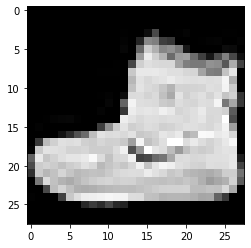

9


In [ ]:
plt.imshow(x_train[0],cmap='gray')
plt.show()
print(y_train[0])

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5241 - accuracy: 0.8166 - val_loss: 0.4151 - val_accuracy: 0.8553
Epoch 2/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3913 - accuracy: 0.8606 - val_loss: 0.3746 - val_accuracy: 0.8669
Epoch 3/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3513 - accuracy: 0.8727 - val_loss: 0.3629 - val_accuracy: 0.8691
Epoch 4/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3237 - accuracy: 0.8822 - val_loss: 0.3375 - val_accuracy: 0.8787
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3060 - accuracy: 0.8880 - val_loss: 0.3237 - val_accuracy: 0.8789
Epoch 6/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2899 - accuracy: 0.8932 - val_loss: 0.3369 - val_accuracy: 0.8793
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.8978 - val_loss: 0.3622 - val_accuracy:

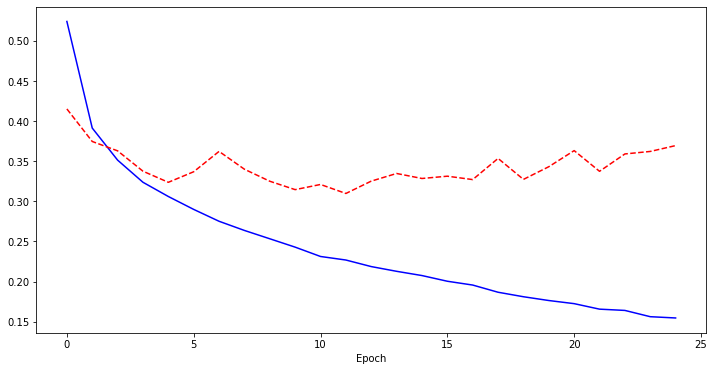

In [38]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'],'b',label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.show()

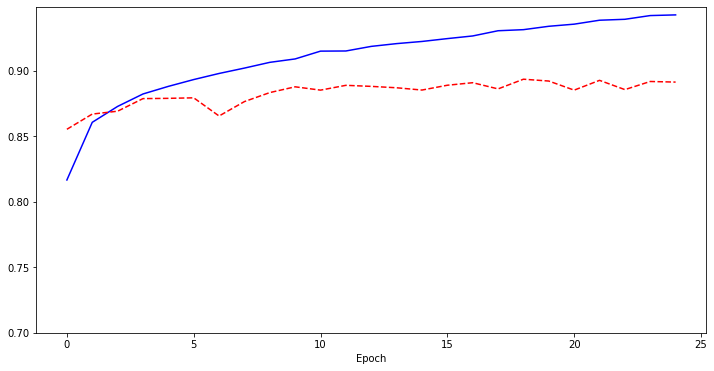

In [39]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'],'b',label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val_accuracy')
plt.ylim(0.7)
plt.xlabel('Epoch')
plt.show()

In [40]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 848us/step - loss: 0.4160 - accuracy: 0.8844


[0.41598403453826904, 0.8844000101089478]